<a href="https://colab.research.google.com/github/toth235a/cracks/blob/main/Crack_segmentation_with_Mask2Former.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a notebook for recognising cracks using a Mask2Former model trained on public crack segmentation datasets. You can input an internet image or one uploaded to your google drive.

Let's download the model.

Before executing this cell, makes sure colab uses a GPU. To do this, **click Runtime > Change Runtime type > T4 GPU > Save**.


In [ ]:
from transformers import Mask2FormerImageProcessor
import torch
from PIL import Image
import matplotlib.pyplot as plt
from transformers import Mask2FormerForUniversalSegmentation
import requests
from io import BytesIO
id2label= {0: 'background', 1: 'crack'}
model = Mask2FormerForUniversalSegmentation.from_pretrained("toth235a/mask2former-swin-large-crack-semantic",
                                                          id2label=id2label,
                                                          ignore_mismatched_sizes=True)
preprocessor2 = Mask2FormerImageProcessor(ignore_index=255, reduce_labels=False, do_resize=False, do_rescale=False, do_normalize=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()



Now we download a crack image from the internet and recognise the crack using the model

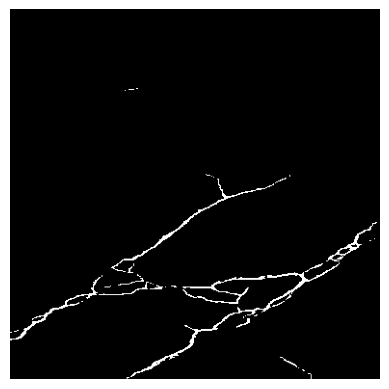

In [4]:
url = "https://www.madebybarb.com/wp-content/uploads/2022/11/Concrete-Basics-FAQs-Why-did-it-crack-madebybarb-feature.jpg"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}


response = requests.get(url, headers=headers)
img = BytesIO(response.content)

crack_image = Image.open(img)
inputs = preprocessor2(crack_image, return_tensors="pt")
pixel_values = inputs["pixel_values"]
with torch.no_grad():
    outputs = model(pixel_values=pixel_values.to(device))
predicted_segmentation_maps = preprocessor2.post_process_semantic_segmentation(outputs)
segmentation_map = predicted_segmentation_maps[0].cpu()
plt.imshow(segmentation_map, cmap='gray')
plt.axis('off')
plt.show()